## FEATURE SELECTION
* When we have a dataset with so many columns (features), we might like to get rid of the features which do not help with the prediction or classification. 
* As we discussed last week, we can achieve this manually by examining the correlation matrix, comparing the p-values and f-stats.
* However, this is Data Science: there are already built-in solutions to determine the most important features. One of them is Scikit-learn's  SelectKBest 
* The SelectKBest method selects the features according to the k highest score. 
* By changing the 'score_func' parameter we can apply the method for both classification and regression data.
  * Use f_regression for regression (see the example below)
  * Use chi2 for classifcation (see the example in the following notebook)

In [1]:
# USUAL SUSPECTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# SM stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/LRdataset.zip?raw=true

--2021-11-15 19:38:57--  https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/LRdataset.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/simsekergun/DATA601/raw/main/2021Fall/datasets/LRdataset.zip [following]
--2021-11-15 19:38:57--  https://github.com/simsekergun/DATA601/raw/main/2021Fall/datasets/LRdataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/LRdataset.zip [following]
--2021-11-15 19:38:57--  https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/LRdataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconte

In [3]:
ls

'LRdataset.zip?raw=true'   sample_data/


In [4]:
from zipfile import ZipFile

In [6]:
file_path = './LRdataset.zip?raw=true'
with ZipFile(file_path, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall(path = './') 
    print('Done!')

File Name                                             Modified             Size
LRdatasetv.csv                                 2021-11-14 22:50:30     29479986
__MACOSX/._LRdatasetv.csv                      2021-11-14 22:50:30          244
Extracting all the files now...
Done!


In [7]:
df = pd.read_csv('LRdatasetv.csv',index_col=[])
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,y
0,0,-41.660868,151.893932,-134.799651,-105.200471,69.317643,107.962854,138.348574,15.339026,-43.476706,13.633445,-29.170849,20.142981,-52.699164,17.294222,221.543062,-16.403348,81.728343,15.080546,122.127716,68.614042,-65.259350,215.631408,31.123915,51.849860,20.765246,65.999233,37.700090,12.963919,104.101812,63.147909,99.632831,-4.964104,6.598383,132.478135,-167.692252,-4.807068,109.204258,63.592185,96.107194,...,183.403866,74.314862,-6.850470,-17.827491,-104.305612,66.648687,3.996595,138.350824,-15.307393,-69.040580,-59.365698,34.942832,-38.525908,18.475167,-9.228663,39.862215,9.347720,-22.841928,54.031952,-10.996345,102.993655,113.223097,-14.920774,0.530173,15.614826,43.421356,10.195112,4.031972,36.324434,44.926132,13.612331,-37.031648,-3.485826,113.845581,3.514959,-11.556563,53.414742,16.373145,1.739519,624
1,1,44.140131,-41.856740,45.092982,53.260663,97.557518,65.853703,153.079910,0.592106,108.495012,48.919094,23.288468,-15.728920,62.690854,13.111808,49.538186,18.571771,-103.282281,31.821323,212.488950,-4.437574,23.360759,-21.265239,52.543122,9.978054,42.248312,46.942430,-6.174970,-18.819683,142.705159,13.071902,98.396040,50.200496,39.510970,-19.110468,-25.005414,9.381161,-19.927875,26.063481,-20.903502,...,6.801705,28.519928,85.444594,19.023663,-78.338934,-10.551266,-1.185567,-55.038908,-132.125802,4.658316,-126.533165,-22.010135,38.555913,39.610971,-45.069975,55.432366,48.584530,13.211068,-1.300195,-27.490577,51.553465,34.900640,33.172303,-20.154582,-32.594110,21.033809,-49.449934,-95.222741,-10.855287,11.976120,77.521307,110.080180,120.028928,85.490341,49.786443,1.714251,108.816487,24.000327,18.875173,559
2,2,-41.909384,52.673069,3.361583,-69.012630,15.299363,-19.558140,-64.703037,46.008731,-43.567056,63.387711,45.738527,38.758030,-127.226079,-41.589435,19.871985,-56.785096,29.536267,9.492092,5.963107,-42.693435,29.983941,129.986352,121.827773,-20.542461,5.582763,-26.559913,88.344221,-34.542169,86.754522,-5.747468,19.733196,20.515892,-1.319858,51.642284,34.709461,29.777115,11.042606,84.909892,-2.411468,...,38.711045,58.730422,30.874932,6.081426,108.439368,12.844964,46.780404,-14.415768,-90.394247,76.091123,-146.649527,-75.889900,-26.556814,32.378078,97.142192,88.279940,30.162890,-45.334638,3.371758,-31.189378,90.744506,-12.797149,26.738396,62.225794,128.190579,83.249864,101.503303,20.525186,-17.114266,13.227607,3.708044,-36.714395,167.633187,122.569307,46.704791,44.128497,58.316012,17.056432,33.951434,631
3,3,68.231260,-74.740381,-178.505589,-179.756964,37.931760,0.823247,34.295100,26.981147,125.154468,-93.339726,24.814271,21.335709,-26.184812,8.518490,-31.508053,123.253025,1.217401,40.848937,38.169754,-2.898259,-68.269798,-110.204914,37.520042,-38.796484,19.964741,-39.559910,55.074316,-2.838423,153.185910,-22.187166,53.577785,72.084811,89.410806,64.401621,70.822003,34.681544,-7.182702,160.604699,-23.063334,...,-75.905104,-11.061663,-22.480660,-38.088757,10.966355,42.207148,-41.122915,-7.422159,131.844623,-116.350986,-45.417024,5.480487,34.918184,14.841013,-15.409053,77.556696,85.180745,-108.925698,-45.246722,-5.684741,-125.783835,67.189651,29.519031,79.534828,62.935818,40.155149,1.288352,-38.756890,-11.306865,32.430456,91.037093,-88.893911,-35.650992,75.426945,66.861555,-6.077139,58.236492,53.864748,5.287489,499
4,4,-55.132265,27.832139,5.371687,117.268904,180.093858,21.083716,-45.661248,34.317152,0.564005,70.360248,95.204801,39.668173,31.211609,-55.325799,29.161537,-21.260452,-13.460926,6.369343,30.493371,75.836560,-44.141966,42.154745,81.423382,-29.113859,48.238783,-16.764300,-76.380096,42.882107,-47.622365,34.257169,-110.129856,-56.760053,-29.790030,-4.739301,-46.721727,76.241191,-24.688371,-2.087786,

In [8]:
XX = df.iloc[:,:-1].values
yy = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
print('MAE:',mean_absolute_error(y_test, yhat))
max_relative_error = np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test)))
print('max_relative_error (%):', 100*max_relative_error)
print('Rsquared:',np.corrcoef(y_test, yhat)[0,1]**2)

MAE: 71.69764840181045
max_relative_error (%): 45.96306432532199
Rsquared: 0.32089739508290693


In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print("Feature data dimension: ", x.shape)

select = SelectKBest(score_func=f_regression, k=100)
z = select.fit_transform(x, y)
print("After selecting best k features:", z.shape)

filter = select.get_support()
features = np.array(x.columns.tolist())
 
print("Selected best features:")
print(features[filter])

Feature data dimension:  (1201, 2001)
After selecting best k features: (1201, 100)
Selected best features:
['8' '11' '16' '33' '76' '111' '117' '195' '271' '287' '325' '326' '336'
 '362' '411' '466' '479' '490' '510' '512' '569' '609' '612' '617' '642'
 '656' '672' '688' '690' '700' '707' '730' '782' '785' '795' '828' '834'
 '846' '879' '882' '892' '920' '948' '954' '991' '1011' '1016' '1028'
 '1045' '1069' '1089' '1121' '1125' '1173' '1223' '1244' '1258' '1260'
 '1270' '1273' '1293' '1308' '1314' '1365' '1376' '1384' '1409' '1412'
 '1420' '1422' '1424' '1431' '1434' '1461' '1491' '1494' '1495' '1529'
 '1602' '1609' '1621' '1624' '1651' '1653' '1705' '1717' '1719' '1745'
 '1779' '1780' '1790' '1802' '1824' '1865' '1888' '1902' '1931' '1936'
 '1953' '1979']


In [10]:
x_filtered = x.iloc[:,filter]
X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y.values, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
print('MAE:',mean_absolute_error(y_test, yhat))
max_relative_error = np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test)))
print('max_relative_error (%):', 100*max_relative_error)
print('Rsquared:',np.corrcoef(y_test, yhat)[0,1]**2)

MAE: 5.6852652057914295
max_relative_error (%): 4.003871008184974
Rsquared: 0.9955147339190108


In [11]:
## first run this
# model = sm.OLS(y_train, sm.add_constant(X_train))
## then compare with
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              282.2
Date:                Mon, 15 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:39:16   Log-Likelihood:                         -4688.3
No. Observations:                 804   AIC:                                      9577.
Df Residuals:                     704   BIC:                                  1.005e+04
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1932      0.034      5.603      0.000       0.126       0.261
x2             0.7521      0.129      5.824      0.000       0.499       1.006
x3             0.0881      0.049      1.797      0.073      -0.008       0.184
x4             0.1172      0.062      1.890      0.059      -0.005       0.239
x5             0.4668      0.052      9.060      0.000       0.366       0.568
x6             0.2462      0.088      2.784      0.006       0.073       0.420
x7            -0.0951      0.128     -0.741      0.459      -0.347       0.157
x8             0.3338      0.069      4.817      0.000       0.198       0.470
x9             0.0831      0.037      2.258      0.024       0.011       0.155
x10            0.1252      0.061      2.064      0.039       0.006       0.244
x11            0.8171      0.094      8.694      0.000       0.633       1.002
x12            0.1821      0.041      4.407      0.000       0.101       0.263
x13            0.0413      0.035      1.179      0.239      -0.027       0.110
x14            0.2470      0.080      3.096      0.002       0.090       0.404
x15            0.0955      0.067      1.432      0.153      -0.035       0.226
x16            0.7893      0.071     11.087      0.000       0.650       0.929
x17            0.0055      0.037      0.149      0.882      -0.067       0.078
x18            0.0664      0.043      1.549      0.122      -0.018       0.151
x19            0.9054      0.101      8.976      0.000       0.707       1.103
x20            0.0067      0.037      0.180      0.857      -0.067       0.080
x21            0.0914      0.042      2.179      0.030       0.009       0.174
x22            0.0226      0.053      0.430      0.667      -0.081       0.126
x23            0.4850      0.056      8.671      0.000       0.375       0.595
x24           -0.0076      0.037     -0.206      0.837      -0.080       0.065
x25           -0.0879      0.058     -1.509      0.132      -0.202       0.026
x26            0.0537      0.040      1.343      0.180      -0.025       0.132
x27            0.3661      0.041      8.949      0.000       0.286       0.446
x28            0.3480      0.094      3.683      0.000       0.162       0.533
x29            0.4580      0.101      4.516      0.000       0.259       0.657
x30            0.1217      0.059      2.073      0.038       0.006       0.237
x31            0.0348      0.051      0.685      0.494      -0.065       0.135
x32            0.8541      0.125      6.828      0.000       0.609       1.100
x33            0.0074      0.039      0.188      0.851      -0.070       0.084
x34            0.0359      0.036      1.010      0.313      -0.034       0.106
x35            0.1349      0.058      2.342      0.019       

In [12]:
coefs = pd.DataFrame({
    'coef': results.params,
    'pvalue': results.pvalues,
}).sort_values(by='pvalue', ascending=False)
coefs

,coef,pvalue
59,-0.003379,9.290921e-01
16,0.005529,8.815374e-01
19,0.006748,8.569258e-01
32,0.007376,8.508725e-01
23,-0.007589,8.371528e-01
...,...,...
43,0.954754,7.509775e-26
15,0.789323,1.926187e-26
47,0.817405,8.714970e-28
62,0.454391,1.199956e-32


(array([46.,  9.,  5.,  3.,  1.,  0.,  2.,  1.,  2.,  1.,  1.,  3.,  1.,
         0.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
         2.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  1.]),
 array([1.08276903e-36, 1.85818413e-02, 3.71636825e-02, 5.57455238e-02,
        7.43273650e-02, 9.29092063e-02, 1.11491048e-01, 1.30072889e-01,
        1.48654730e-01, 1.67236571e-01, 1.85818413e-01, 2.04400254e-01,
        2.22982095e-01, 2.41563936e-01, 2.60145778e-01, 2.78727619e-01,
        2.97309460e-01, 3.15891301e-01, 3.34473143e-01, 3.53054984e-01,
        3.71636825e-01, 3.90218666e-01, 4.08800508e-01, 4.27382349e-01,
        4.45964190e-01, 4.64546031e-01, 4.83127873e-01, 5.01709714e-01,
        5.20291555e-01, 5.38873396e-01, 5.57455238e-01, 5.76037079e-01,
        5.94618920e-01, 6.13200762e-01, 6.31782603e-01, 6.50364444e-01,
        6.68946285e-01, 6.87528127e-01, 7.06109968e-01, 7.24691809e-

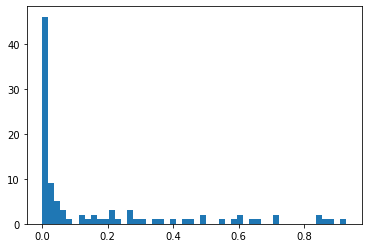

In [13]:
plt.hist(coefs.pvalue,bins=50)

In [14]:
feature_cols = coefs[coefs.pvalue < 0.05].index
print(len(feature_cols))

60


In [15]:
# fit the model
model = LinearRegression()
model.fit(X_train[:,feature_cols], y_train)
# evaluate the model
yhat = model.predict(X_test[:,feature_cols])
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.2f' % mae)
max_relative_error = 100*np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test)))
print('max_relative_error: %.2f' % max_relative_error)

MAE: 5.50
max_relative_error: 3.97


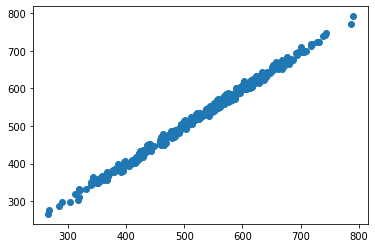

In [16]:
plt.scatter(y_test,yhat)

### How to determine the optimum k for SelectKBest

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

mae = []
max_relative_error= []
Rsquared = []
    
ks = np.arange(10,100)
for i in ks:    
    select = SelectKBest(score_func=f_regression, k = i)
    z = select.fit_transform(x, y)
    filter = select.get_support()
    features = np.array(x.columns.tolist())
    x_filtered = x.iloc[:,filter]
    X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y.values, test_size=0.33, random_state=1)
    # fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # evaluate the model
    yhat = model.predict(X_test)
    # evaluate predictions
    mae = np.append(mae,mean_absolute_error(y_test, yhat))
    max_relative_error = np.append(max_relative_error, np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test))))
    Rsquared = np.append(Rsquared,np.corrcoef(y_test, yhat)[0,1]**2)

Text(0, 0.5, 'MAE')

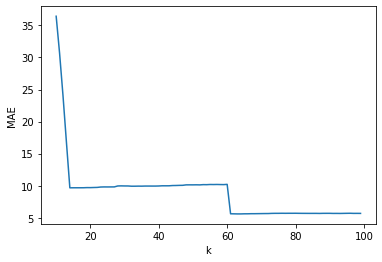

In [18]:
plt.plot(ks,mae)
plt.xlabel('k')
plt.ylabel('MAE')

Text(0, 0.5, 'max_relative_error')

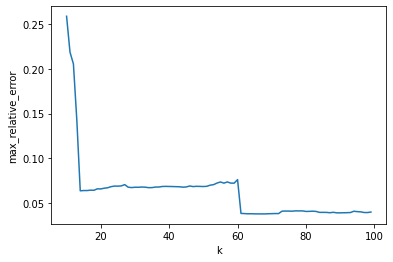

In [19]:
plt.plot(ks,max_relative_error)
plt.xlabel('k')
plt.ylabel('max_relative_error')

Text(0, 0.5, 'Rsquared')

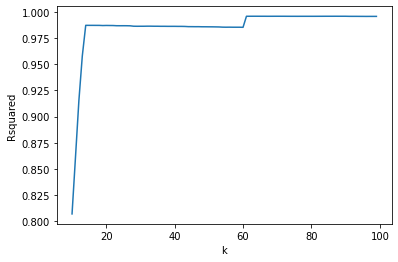

In [20]:
plt.plot(ks,Rsquared)
plt.xlabel('k')
plt.ylabel('Rsquared')

In [21]:
    select = SelectKBest(score_func=f_regression, k = 62)
    z = select.fit_transform(x, y)
    filter = select.get_support()
    features = np.array(x.columns.tolist())
    x_filtered = x.iloc[:,filter]
    X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y.values, test_size=0.33, random_state=1)
    # fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # evaluate the model
    yhat = model.predict(X_test)
    # evaluate predictions
    mae_best = mean_absolute_error(y_test, yhat)
    max_relative_error_best = np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test)))
    Rsquared_best = np.corrcoef(y_test, yhat)[0,1]**2
    print(mae_best,max_relative_error_best,Rsquared_best)

5.614326608113953 0.03803724142840343 0.9956383014068134


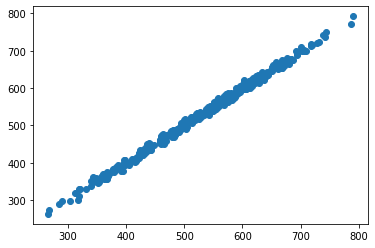

In [22]:
plt.scatter(y_test,yhat)

This is only an introduction to "feature selection". There are so many other techqniques, which you will learn in DATA 602. <br>
Now let's briefly discuss Logistic Regression ==> next notebook